In [1]:
from tsp_annealing import *
import matplotlib.pyplot as plt

In [5]:
def plot_TSP_solution(cities, permutation_method):
    plt.figure(figsize=(8, 6))
    plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
    plt.title('Map')

    distances = calculate_distances(cities)

    best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, altering_method=permutation_method, max_iterations=int(1E5), alpha=0.9999)

    print("Best tour:", best_tour)
    print("Best distance:", best_distance)

    plot_tour(best_tour, cities, permutation_method)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(cost_over_iterations)
    plt.title('Tour Distance Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Distance')
    plt.show()

    plt.plot(temperature_over_interations)
    plt.title('Temperature Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')

    plt.show()

def best_distance(cities, permutation_method):
    distances = calculate_distances(cities)

    best_tour, best_tour_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, altering_method=permutation_method, max_iterations=int(1E5), alpha=0.9999)

    print("For the \'%s\' method"%(permutation_method))
    # print("Best tour:", best_tour)
    print("Best distance:", best_tour_distance)



cities = load_graph('TSP-Configurations/eil51.tsp.txt')
# plot_TSP_solution(cities, 'swap')
# plot_TSP_solution(cities, 'reverse')
# plot_TSP_solution(cities, 'insert')

best_distance(cities, 'reverse')
best_distance(cities, 'insert')



For the 'reverse' method
Best tour: [ 6 25  7 30 27  2 35 34 19 28 20 33 29  8 49 15  1 21  0 31 10 37  4 48
  9 38 32 44 14 43 41 18 39 40 12 17 46  3 16 36 11 45 50 26 47  5 13 24
 23 42 22]
Best distance: 434.69935158865417
For the 'insert' method
Best tour: [33, 20, 49, 15, 1, 28, 19, 34, 35, 2, 21, 27, 30, 7, 25, 6, 42, 23, 22, 47, 50, 45, 11, 4, 48, 8, 37, 10, 31, 0, 26, 5, 13, 24, 17, 46, 3, 12, 40, 39, 18, 41, 43, 16, 36, 14, 44, 32, 38, 9, 29]
Best distance: 451.434459176393


In [7]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')
# plot_TSP_solution(cities, 'swap')
# plot_TSP_solution(cities, 'reverse')

best_distance(cities, 'swap')
best_distance(cities, 'reverse')
best_distance(cities, 'insert')


For the 'swap' method
Best tour: [147 138 109 111 117 120 152 149 267   5   4   0   2 244 250 251 264 139
 141 104 103  80  88  79 112  69  58  41  42  60  61  62 173 160 180 202
 204 246 229 227 213 205 274 275 278   3 279 257 142 162 163 171 169 166
 165 164 186 185 200 261 273 271 134 268 258 255 248 243 240 241   1 242
 249 203 201 193 196 145 148 177 178 197 192 191 190 189 188 187 170 172
 105 102 100 101 168 167  99  98  95  92 108  89 116  57  43  44  46  53
  54  55  56  68  67  63 115 113 110  83  73  72  37  36  49  50  51  48
 159 174 161 184 183 182 181 155 129 153 156 157 114  87  82  81  78  76
  74  77  94  97  90 106 158 154 127  20  24  23 135 176 175 179 199 143
 207 254 231 233 226 223 222 214 215 221 216 217 212 211 206 210 228 230
 238 239 237 236 245 247 277 276   8   6   7  10  14 263 146 140 137  29
  33  38  34  35 151 150 144 198 195 194 220 219 218 224 225 234 235 232
 208 209 252 253 256 262 266 136  19 124  39  40  32 270 272  11  12  13
  16 269 133 132 1

In [ ]:
cities = load_graph('TSP-Configurations/pcb442.tsp.txt')
plot_TSP_solution(cities, 'swap')
plot_TSP_solution(cities, 'reverse')

In [9]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
distances = calculate_distances(cities)

num_runs = 50
run_simulations(num_runs=num_runs, distances=distances, output='fitness_statistics')

(600.7399360697783, 32.334519597538154, (591.4572718123043, 610.0226003272523))

In [10]:
max_iterations_list = range(100, 20000, 1000)

means, stds, conf_intervals = run_vary_maxiter(num_runs, distances, max_iterations_list)


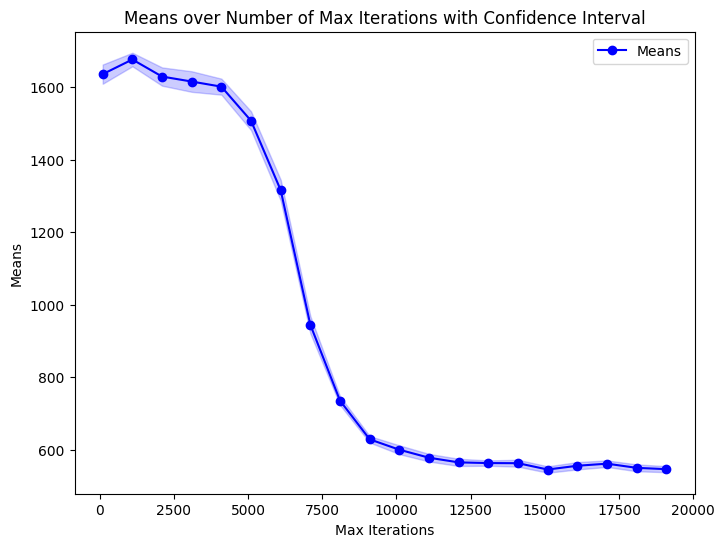

In [11]:
means = np.array(means)
lower_bounds = np.array([interval[0] for interval in conf_intervals])
upper_bounds = np.array([interval[1] for interval in conf_intervals])

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, means, marker='o', linestyle='-', color='blue', label='Means')
plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.2, color='blue')


plt.title('Means over Number of Max Iterations with Confidence Interval')
plt.xlabel('Max Iterations')
plt.ylabel('Means')
plt.legend()

plt.show()
